In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [36]:
# taking two list to grab jobs and theier median salary job wise
jobs = []
median_salary = []

In [37]:
# creating group based on job_titles
job_grp = df.groupby('job_title')

In [38]:
# running loop to grab jobs and median salary
for job in df['job_title']:
    jobs.append(job)
    m_salary = job_grp.get_group(job)['salary_in_usd'].median()
    median_salary.append(m_salary)

In [39]:
# creating new DataFrame using jobs and median_salary 
data = {'jobs':jobs,'median_salary':median_salary}
df_new = pd.DataFrame(data)

In [41]:
# sorting the DataFrame based on their median_salary
df_new.sort_values(['median_salary'], ascending = False, inplace = True)

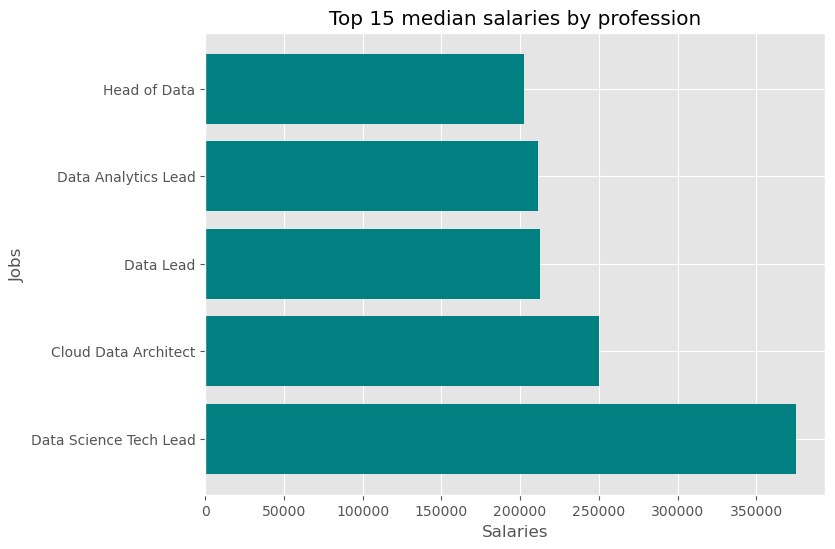

In [43]:
# plotting horizental bar chart of Top 15 median salaries by profession
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
plt.title('Top 15 median salaries by profession')
plt.xlabel('Salaries')
plt.ylabel('Jobs')
plt.barh(df_new['jobs'].head(15), df_new['median_salary'].head(15), color='teal')
plt.show()